In [11]:
from dl1_data_handler.reader import DL1DataReader
from ctapipe.instrument.camera import CameraGeometry
from dl1_data_handler.image_mapper import ImageMapper

#from dl1_data_handler.writer import DL1DataWriter
#from dl1_data_handler.writer import CTAMLDataDumper

import tables
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Loading Gamma Testfile using the DL1DataReader:

filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
reader_g = DL1DataReader([filePath_gamma])
print("Sucessfully opended gamma data with DataLoader!")


Sucessfully opended gamma data with DataLoader!


In [17]:
# Exploring the File

print(reader_g)
print(dir(reader_g))
print(dir(reader_g.__dict__))
print(dir(reader_g.__dir__))
print(reader_g.event_info)

# As described in dl1_data_handler_demo.ipynb:

print("Image shape: {}".format(reader_g[0][0].shape))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_append_subarray_info', '_construct_simulated_info', '_construct_unprocessed_example_description', '_get_camera_type', '_get_image', '_v_attrs', 'class_weight', 'event_info', 'files', 'mode', 'shower_primary_id_to_name', 'subarray_info']
['__class__', '__class_getitem__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__ior__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__ror__', '__setattr__', '__setit

TypeError: 'DL1DataReader' object is not subscriptable

In [14]:
filePath_gamma="../../../mnt/c/Users/hanne/Desktop/Studium Physik/ECAP_HiWi_CNN/ECAP_HiWi_WorkingDirectory/phase2d3_timeinfo_gamma_diffuse_hybrid_preselect_20deg_0deg.h5"
data_g = tables.open_file(filePath_gamma, mode="r")
print(data_g.get_node('/dl1/event/telescope/images/tel_001').read())

[(13275,   32910, 1, [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.000000

In [19]:
#print(data_g.get_node('/dl1/event/telescope/images/tel_001').read()[0][3])
event1 = data_g.get_node('/dl1/event/telescope/images/tel_001').read()[0][3]
print(np.shape(event1))

(960,)


In [1]:
# Following the description of test_image_mapper.ipynb:
from dl1_data_handler.reader import DL1DataReader
from ctapipe.instrument.camera import CameraGeometry
from dl1_data_handler.image_mapper import ImageMapper
# Define the camera types and mapping methods
hex_cams = ['HESS-I']
camera_types = hex_cams 
hex_methods = ['oversampling', 'rebinning', 'nearest_interpolation',
               'bilinear_interpolation', 'bicubic_interpolation', 
               'image_shifting', 'axial_addressing']


In [2]:

# Load the image mappers
mappers = {}
print("Initialization time (total for all telescopes):")
for method in hex_methods:
    print(method)
    mapping_method = {cam: method for cam in hex_cams}
    %timeit mappers[method] = ImageMapper(mapping_method=mapping_method,camera_types=["HESS-I"])

Initialization time (total for all telescopes):
oversampling


165 ms ± 13.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
rebinning
1.52 s ± 277 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
nearest_interpolation
103 ms ± 30.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
bilinear_interpolation
166 ms ± 10.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
bicubic_interpolation
1.69 s ± 281 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
image_shifting
54.6 ms ± 11.7 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
axial_addressing
51.2 ms ± 12.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [21]:
import numpy as np
# Generate test pixel values (value is the pixel number)
test_pixel_values = {}
for cam in camera_types:
    num_pixels = len(CameraGeometry.from_name(cam).pix_id)
    test_pixel_values[cam] = event1 #np.arange(num_pixels)
    test_pixel_values[cam] = np.expand_dims(test_pixel_values[cam], axis=1)

In [22]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig, ax = plt.subplots(1)
    ax.set_aspect(1)
    ax.pcolor(image[:,:,0], cmap='viridis')
    plt.show()

HESS-I: Default


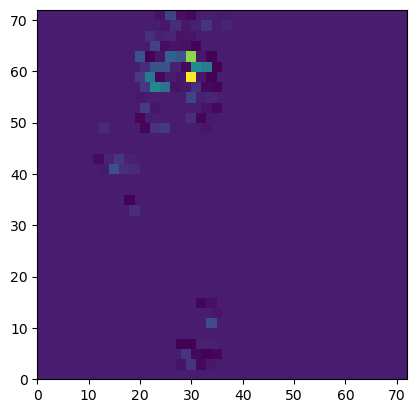

HESS-I: Padding


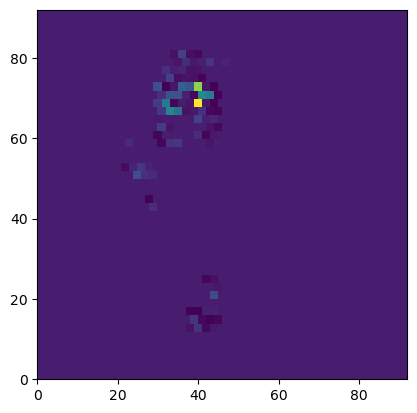

In [23]:
# Plot mapped images with and without padding
default_mapper = ImageMapper(camera_types=['HESS-I'])
padding_mapper = ImageMapper(padding={cam: 10 for cam in camera_types},camera_types=["HESS-I"])
for cam in camera_types:
    print('{}: Default'.format(cam))
    image = default_mapper.map_image(test_pixel_values[cam], cam)
    plot_image(image)
    print('{}: Padding'.format(cam))
    image = padding_mapper.map_image(test_pixel_values[cam], cam)
    plot_image(image)